<a href="https://colab.research.google.com/github/rgclapp007/pinn_clusters/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example notebook


#Setting up

You can open this notebook open by clicking on the previous cell from github. Switch to a t-4 instance and execute the following cell to install the software associated with the paper




In [ ]:
!python -m pip install " @ git+https://github.com/rgclapp_007/ice-pinn.git@102202da601a81297ade5323f11f6b01e6bc333c"


In [ ]:
"""Import external packages"""
import sys
import time
from pathlib import Path
import math as m
import numpy as np
from scipy.io import loadmat
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from pinn_clusters import gamma_batch

In [ ]:
"""Define the domain of the problem"""
#Import ground truth data for u,h and their x-positions (x) from which to build synthetic noisy training data
data = loadmat('data/constantB_uh.mat') #file path to ground truth u(x), h(x) profiles. To test sinusoidal B(x) studied in our paper, replace with location of "sinusoidalB_uh.mat".
x_star = np.transpose(data['x'])
u_star = np.transpose(data['u'])[:, 0]
h_star = np.transpose(data['h'])[:, 0]
B_truth = np.ones_like(x_star) #B(x) profile used to solve for ground truth u and h profiles. REPLACE rhs with 0.5*np.cos(3*np.pi*x_star) + 1 to test the sinusoidal profile studied in our paper.


NameError: name 'loadmat' is not defined

In [ ]:
"""Parameters"""
# Data parameters
N_t = 1001  # Number of collocation points
N_ob = 401  # Number of training points.

# Model parameters
layers = [20,20,20,20,20,20, 3] #Number of hidden units in each layer.
lyscl = [1, 1, 1, 1, 1, 1] #Standard deviation to set the scales for Xavier weight initialization.

# Hyper parameters for the PINN
fractional = False

num_iterations_adam_resampled = 4000   #Number of iterations of Adam using collocation resampling
num_iterations_adam_fixed = 2000      #Number of iterations of Adam with fixed collocation points
num_iterations_lbfgs = 2000           #umber of iterations of LBFGS using fixed collocation points

#helper function for storing the results from one or more values of gamma in one call.

In [ ]:
def format_dict(dict_list):
    berrs = []
    uerrs = []
    herrs = []
    bpreds = []
    d_losses = []
    e_losses = []
    t_losses = []
    u_preds = []
    h_preds = []
    u_samp = []
    h_samp = []

    for i in range(len(dict_list)):
        berrs.append(dict_list[i]["B_err"])
        uerrs.append(dict_list[i]["u_err"])
        herrs.append(dict_list[i]["h_err"])
        bpreds.append(dict_list[i]["B_p"])
        d_losses.append(dict_list[i]["data_losses"])
        e_losses.append(dict_list[i]["equation_losses"])
        t_losses.append(dict_list[i]["total_losses"])
        u_preds.append(dict_list[i]["u_p"])
        h_preds.append(dict_list[i]["h_p"])
        u_samp.append(dict_list[i]["u_sampled"])
        h_samp.append(dict_list[i]["h_sampled"])

    new_dict = {"berrs" : np.asarray(berrs),
                "uerrs" : np.asarray(uerrs),
                "herrs" : np.asarray(herrs),
                "bpreds" : np.asarray(bpreds),
                "d_losses" : d_losses, #just keep as list
                "e_losses" : e_losses, #just keep as list
                "t_losses" : t_losses, #just keep as list
                "u_p" : np.asarray(u_preds),
                "h_p" : np.asarray(h_preds),
                "u_sampled" : np.asarray(u_samp),
                "h_sampled" : np.asarray(h_samp)
               }
    return new_dict


In [ ]:

# set the noise value of the training data
test_noise = 0.3

#select gammas to test:

# some options
# Option 1: choose gamma ratios logarithmically from 10^-4 to 10^8
logratios = np.linspace(-4,8,13)
test_gammas = np.power(10,logratios)/(1+np.power(10,logratios))

# Option 2: choose a single value of gamma (e.g. gamma = 0.5)
#gamma = 0.5
#test_gammas = np.asarray([gamma])

#test gamma value(s) and store results in a python dictionary

NameError: name 'np' is not defined

In [ ]:
#test gamma value(s) and store results in a python dictionary
results = gamma_batch(test_gammas, test_noise, x_star, u_star, h_star,
                      layers,lyscl, N_ob, fractional, N_t,
                      num_iterations_adam_resampled, num_iterations_adam_fixed,
                      num_iterations_lbfgs, B_truth)
result    = format_dict(results)


NameError: name 'gamma_batch' is not defined

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
x_star = np.linspace(start = 0.0, stop = 1.0, num = 401) #define spatial domain

#load the B, u, h profiles predicted by PINN

u_prediction = result['u_p'][0]
h_prediction = result['h_p'][0]
B_prediction = result['bpreds'][0]

#load the synthetic training data for u and h
u_sampled = result['u_sampled'][0]
h_sampled = result['h_sampled'][0]

#load ground truth u, h, and B profiles (constant B(x))
ground_B = np.ones_like(x_star)
ground_u = loadmat('constantB_uh.mat')['u'].flatten()
ground_h = loadmat('constantB_uh.mat')['h'].flatten()

**1. Check the final $u(x)$, $h(x)$, and $B(x)$ profiles after training compared to the ground truth.**


NameError: name 'x_star' is not defined

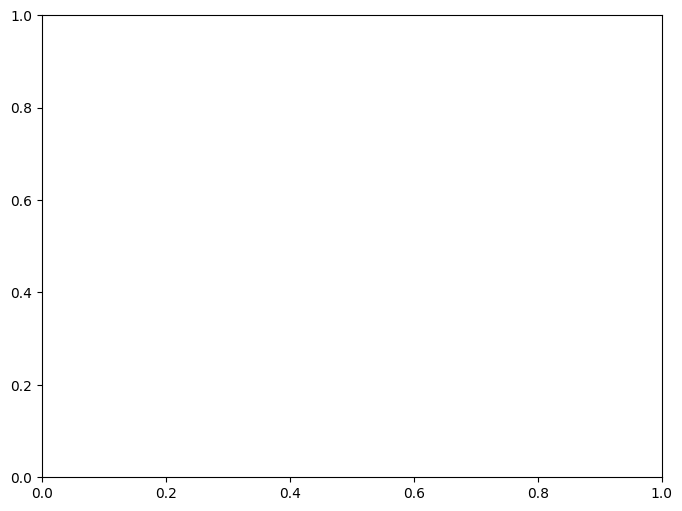

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (8,6))

ax.plot(x_star, u_prediction, label = 'Predicted $u(x)$')
ax.plot(x_star, h_prediction, label = 'Predicted $h(x)$')
ax.plot(x_star, B_prediction, label = 'Predicted $B(x)$')

ax.plot(x_star, ground_u, linestyle = ':', color = 'black', label = 'Ground truth $u(x)$, $h(x)$, $B(x)$')
ax.plot(x_star, ground_h, linestyle = ':', color = 'black')
ax.plot(x_star, ground_B, linestyle = ':', color = 'black')
ax.set_xlabel('$x$')
ax.grid()
ax.legend()
ax.set_title('Ground Truth vs. Predicted Profiles', style = 'italic')

**2. Compare the ground truth $u(x)$ and $h(x)$ profiles to the synthetic training data generated and used in this trial.**

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (8,6))
ax.plot(x_star, u_sampled, 'o', markersize = 1.0, label = 'Training data, $u(x)$')
ax.plot(x_star, h_sampled,'o', markersize = 1.0, label = 'Training data, $h(x)$')

ax.plot(x_star, ground_u, color = 'blue', label = 'Ground truth, $u(x)$')
ax.plot(x_star, ground_h, color = 'orange', label = 'Ground truth, $h(x)$')
ax.set_xlabel('$x$')
ax.grid()
ax.legend()
ax.set_title('Ground Truth vs. Training data', style = 'italic')